# Descenso del gradiente

## Dependencias

In [7]:
from matplotlib import cm # manejo de colores
import numpy as np
import matplotlib.pyplot as plt

## Gráfica en 3D de nuestra función de coste

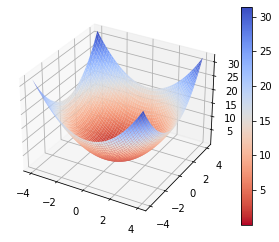

In [8]:
fig, ax =plt.subplots(subplot_kw={'projection': '3d'})

def f(x, y):
    return x**2 + y**2

res = 100

x = np.linspace(-4,4,num=res)
y = np.linspace(-4,4,num=res)

# crear puntos de coordenadas
X,Y = np.meshgrid(x,y)

# aplicar los puntos de coordenadas a la función
Z = f(X,Y)

# pintar los puntos para obtener la superficie de la gráfica
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm_r)
fig.colorbar(surf)
plt.show()


## Descenso del gradiente
Optimización (mínimo) de una función de coste para reducir el error de nuestras predicciones

In [49]:
# coordenada aleatoria entre -4 y 4
p = np.random.rand(2)*8 - 4
p

array([ 3.4015918, -3.014052 ])

## Derivada

Utilizando la fórmula (multivariable): $${f(x_{1}+h, y_{1}+h) - f (x, y) \over h}$$

In [29]:

h = 0.01

def derivate(cp, p):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

## Graficando descenso del gradiente

Fórmula del gradiente: $$w: w - \alpha *\nabla f$$



Punto final (mínimo local): [-0.00499999 -0.00500001]




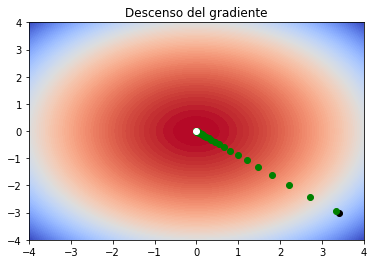

In [57]:
level_map = np.linspace(np.min(Z), np.max(Z), num=res)
plt.contourf(X,Y,Z,levels=level_map, cmap=cm.coolwarm_r)
plt.title("Descenso del gradiente")

#ubicar la coordenada aleatoria en el gráfico
plt.plot(p[0], p[1], 'o', c='k')
#plt.show()

def gradient(p):
    grad = np.zeros(2)

    for idx, value in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h

        # derivar componente 'x' y 'y'
        dp = derivate(cp, p)

        grad[idx] = dp
    
    return grad

#learning rate
lr = 0.01

# mientras más recorridos se hagan, más se aproximizará a CERO 
point = p
for i in range(1000):
    point = point - lr*gradient(point)

    if (i%10 == 0):
        plt.plot(point[0], point[1], 'o', c='g')
        pass

plt.plot(point[0], point[1], 'o', c='w')
print(f"""

Punto final (mínimo local): {str(point)}

""")
plt.show()

## Desventaja
El descenso del gradiente solo llega a mínimos locales. Si la función tuviera más mínimos, agarraría aleatoriamente cualquier mínimo, sin importar si es el mínimo local menor